In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn

## Aux functions

In [13]:
def parse_emotion(emotion,emo_dict):
    return emo_dict[emotion]
def process_pixels(pixel_str):
    pixel_lst=[int(px) for px in pixel_str.split()]
    return pixel_lst
def show_some_emotion(df,num=[3,5]):
    faces=np.random.choice(range(len(df)),size=num[0]*num[1],replace=False)
    fig,axes=plt.subplots(num[0],num[1],figsize=(num[1]*2.5,num[0]*2.5))
    for i in range(num[0]):
        for j in range(num[1]):
            face=faces[i*num[1]+j]
            axes[i][j].imshow(np.array(df['pixels'].iloc[face]).reshape(48,48),cmap='gray')
            axes[i][j].set_title(df['emotion'].iloc[face])
    plt.tight_layout()
    plt.show()
def filter_emotions(df,keep_emotions):
    return df[df['emotion'].isin(keep_emotions)]
def equalize_groups(df,label):
    largest_group=df.groupby(label).count().max()[0]
    upscaled_groups=[]
    for _,group in df.groupby(label):
        group_ratio=int(round(1.0*largest_group/len(group)))
        upscaled_groups.extend([group]*group_ratio)
    return pd.concat(upscaled_groups,axis=0,ignore_index=True)
def normalize_pixels(pixel_lst,factor=255):
    if factor=='norm':
        px_avg=np.mean(pixel_lst)
        px_std=np.std(pixel_lst)
        pixel_lst=[(1.0*px-px_avg)/px_std for px in pixel_lst]
    elif factor=='max':
        px_max=np.max(pixel_lst)
        pixel_lst=[1.0*px/px_max for px in pixel_lst]
    else:
        pixel_lst=[1.0*px/factor for px in pixel_lst]
    return pixel_lst
def prepare_data(faces_file,emo_dict,
                 emo_filter=False,
                 equalize=True,
                 sample=False,random_state=None,
                 plot_sample=[3,5],
                 normalize=255):
    df=pd.read_csv(faces_file,usecols=[0,1])
    df['emotion']=df['emotion'].map(lambda emotion: parse_emotion(emotion,emo_dict))
    if emo_filter!=False:
        df=filter_emotions(df,keep_emotions)
    if equalize:
        df=equalize_groups(df,'emotion')
    if sample:
        df=df.sample(sample,random_state=random_state)
    df['pixels']=df['pixels'].map(process_pixels)
    if plot_sample!=False:
        show_some_emotion(df,plot_sample)
    if normalize:
        df['pixels']=df['pixels'].map(lambda pixels: normalize_pixels(pixels,factor=normalize))
    X=np.array(df['pixels'].values.tolist())
    labels=list(df['emotion'].unique())
    Y=df['emotion'].map(lambda x: labels.index(x)).values
    return X,Y

## Data preparation

In [3]:
file_name='data/fer2013.csv.bz2'
num_rows=None

df=pd.read_csv(file_name,usecols=[0,1],nrows=num_rows)
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:
emo_dict={0:'Anger',1:'Disgust',2:'Fear',3:'Happiness',4:'Sadness',5:'Surprise',6:'Neutrality'}

df['emotion']=df['emotion'].map(lambda emotion: parse_emotion(emotion,emo_dict))
df.groupby('emotion').count()

,pixels
emotion,
Anger,4953
Disgust,547
Fear,5121
Happiness,8989
Neutrality,6198
Sadness,6077
Surprise,4002


In [5]:
df['pixels']=df['pixels'].map(process_pixels)
df.head()

,emotion,pixels
0,Anger,"[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, 4..."
1,Anger,"[151, 150, 147, 155, 148, 133, 111, 140, 170, ..."
2,Fear,"[231, 212, 156, 164, 174, 138, 161, 173, 182, ..."
3,Sadness,"[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, 2..."
4,Neutrality,"[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 23..."


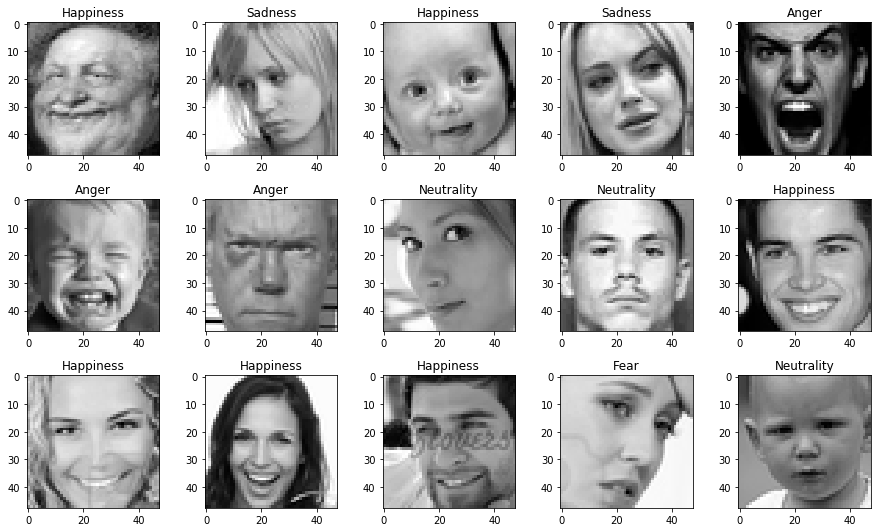

In [6]:
show_some_emotion(df)

## Filter emotions

In [7]:
keep_emotions=['Anger','Disgust']

df=filter_emotions(df,keep_emotions)
df.groupby('emotion').count()

,pixels
emotion,
Anger,4953
Disgust,547


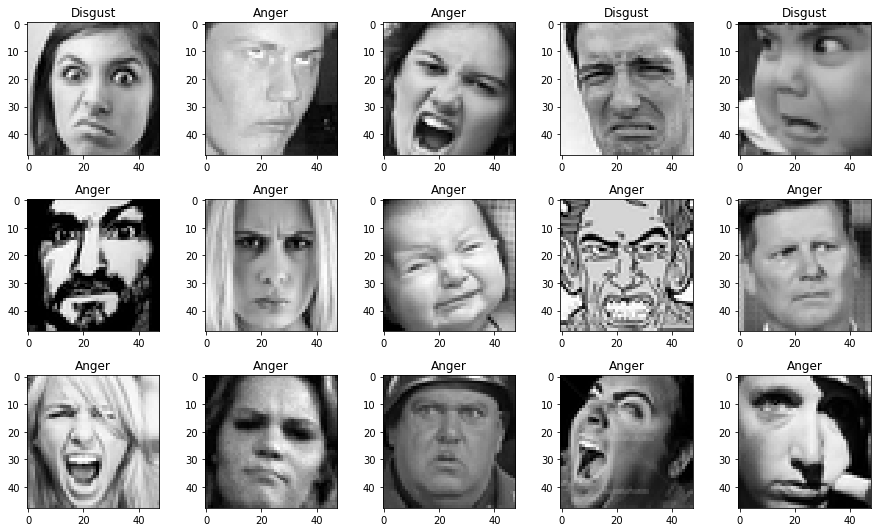

In [8]:
show_some_emotion(df)

## Normalize

In [9]:
df['pixels']=df['pixels'].map(lambda pixels: normalize_pixels(pixels,factor=255))
df.head()

,emotion,pixels
0,Anger,"[0.274509803922, 0.313725490196, 0.32156862745..."
1,Anger,"[0.592156862745, 0.588235294118, 0.57647058823..."
10,Anger,"[0.117647058824, 0.0941176470588, 0.0823529411..."
22,Anger,"[0.482352941176, 0.490196078431, 0.48627450980..."
23,Anger,"[0.0313725490196, 0.0352941176471, 0.054901960..."


## Equalize

In [10]:
df=equalize_groups(df,'emotion')
df.groupby('emotion').count()

,pixels
emotion,
Anger,4953
Disgust,4923


## Construct arrays

In [11]:
X=np.array(df['pixels'].values.tolist())
Y=df['emotion'].map(lambda x: keep_emotions.index(x)).values
X.shape,Y.shape

((9876, 2304), (9876,))

## With the function

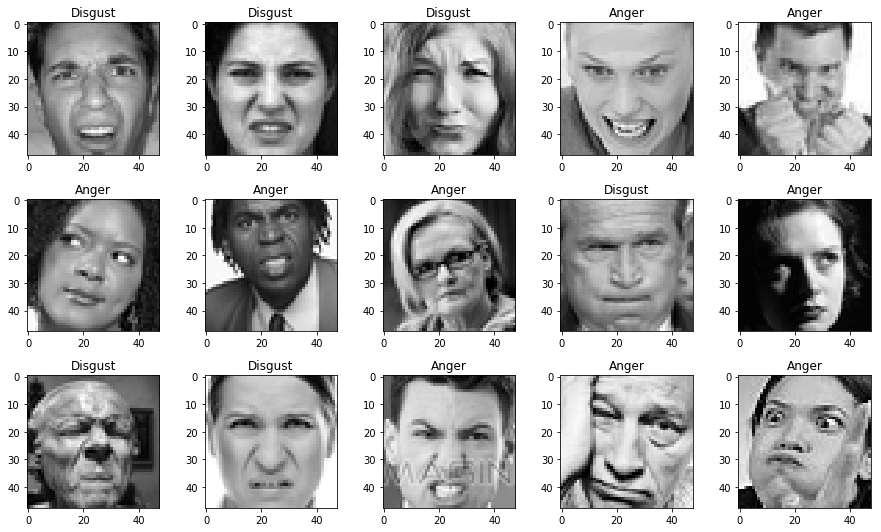

In [15]:
X,Y=prepare_data(file_name,emo_dict,
                 emo_filter=keep_emotions,
                 equalize=True,
                 sample=False,random_state=None,
                 plot_sample=[3,5],
                 normalize=255)

In [16]:
X.shape,Y.shape

((9876, 2304), (9876,))

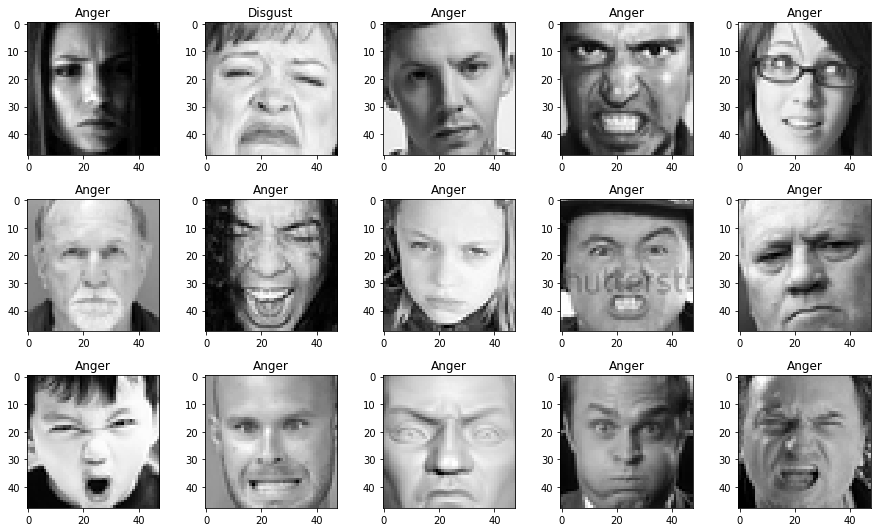

In [17]:
X,Y=prepare_data(file_name,emo_dict,
                 emo_filter=keep_emotions,
                 equalize=False,
                 sample=1000,random_state=None,
                 plot_sample=[3,5],
                 normalize=255)

In [18]:
X.shape,Y.shape

((1000, 2304), (1000,))